# Forecasting with ARMA

# Practice

In [90]:
# Importing required liabraries

import numpy as np                                            # working with arrays
import pandas as pd                                           # loading the dataset
import matplotlib.pyplot as plt                               # visualization
import seaborn as sb                                          # visualization and correlation
from statsmodels.tsa.seasonal import seasonal_decompose       #splitting time series data into several components trend, seasonal and residual
from statsmodels.tsa.api import SimpleExpSmoothing            #Liabrary to apply Simple Exponent Technique
from statsmodels.tsa.api import ExponentialSmoothing          #Liabrary to apply Double and Triple Exponent Technique
from statsmodels.tsa.stattools import adfuller                # dickey fuller test for stationary check
from statsmodels.tsa.stattools import acf,pacf                # for finding value of p and q
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  # for plotting acf & pacf plot
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA                 # for model building
from sklearn.metrics import mean_squared_error                # for model evaluation

## Task 1 : Data Preparation

### Task 1.1 :  Load the dataset into Pandas dataframe (train and test)

In [15]:
# Loading the dataset

train_data = pd.read_csv(r"C:\Users\Admin\Desktop\Level -1\C1\Repository\DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv",parse_dates=['date'])

test_data = pd.read_csv(r"C:\Users\Admin\Desktop\Level -1\C1\Repository\DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv",parse_dates=['date'])

In [16]:
# previewing the train data
train_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [17]:
# setting date as index column
train_data.set_index('date',inplace=True)

# previewing the train data again 
train_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [18]:
# previewing the train data
test_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [19]:
# setting date as index column
test_data.set_index('date',inplace=True)

# previewing the test data again
test_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


### Task 1.2 : Do some visual inspections of the data

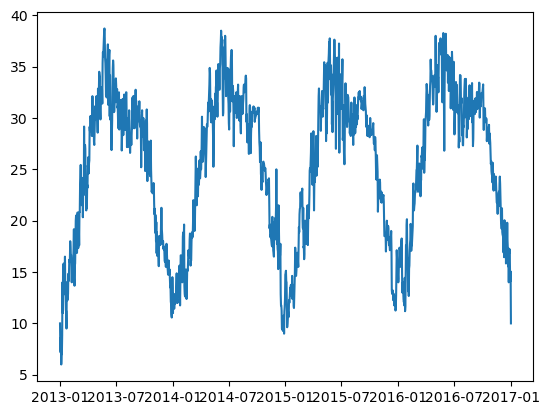

In [94]:
# date vs meantemperature plot
plt.plot(train_data['meantemp'])

Performing task 2 before task-1.3 as data needs to be stationary before smoothening it

## Task 2 : Stationarity 

### Task 2.1 : Check if the time series is stationary and use the Augumented  Dickey-Fuller test for stationarity testing.

In [20]:
# taking only 'meantemp' column from the dataset and storing in variable Temperature for further process
Temperature = train_data['meantemp']
Temperature.head()

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
Name: meantemp, dtype: float64

In [21]:
# ADF test to determine data stationarity

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)


    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to Model Building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before Model Building".format(pvalue)
    
    return msg

In [22]:
# Calling function

print(checkStationarity(Temperature))

0.27741213723016156
pvalue=0.27741213723016156. Data is not Stationary. Make the data stationary before Model Building


### Task 2.2 : If the time series is not stationary, apply other methods to achieve stationarity. 

In [23]:
# difference the data by 7 
diff_Temp = Temperature - Temperature.shift(7)
print(diff_Temp )

date
2013-01-01         NaN
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-05         NaN
                ...   
2016-12-28   -0.832609
2016-12-29   -2.047619
2016-12-30   -1.454762
2016-12-31   -2.265550
2017-01-01   -4.000000
Name: meantemp, Length: 1462, dtype: float64


In [27]:
# remove the Nulls from the differenced data
print('Before removing Nulls,total records = ', len(diff_Temp))
diff_Temp.dropna(inplace = True)
print('After removing Nulls, total records = ', len(diff_Temp))
print(diff_Temp)

Before removing Nulls,total records =  1462
After removing Nulls, total records =  1455
date
2013-01-08   -1.142857
2013-01-09    6.600000
2013-01-10    3.833333
2013-01-11    7.047619
2013-01-12    8.000000
                ...   
2016-12-28   -0.832609
2016-12-29   -2.047619
2016-12-30   -1.454762
2016-12-31   -2.265550
2017-01-01   -4.000000
Name: meantemp, Length: 1455, dtype: float64


In [28]:
# ADF test to determine data stationarity

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)


    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to Model Building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before Model Building".format(pvalue)
    
    return msg

In [29]:
# check if the differenced data is stationary
checkStationarity(diff_Temp)

4.1866103935467265e-06


'pvalue=4.1866103935467265e-06. Data is Stationary. Proceed to Model Building'

Conclusion : In the above figure the Actual plot shows the trend in the data which makes the data Not stationary that means 
we can not proceed with the time series model. But after doing differencing we do not find the trend component in the plot which 
make the data stationary also indicate that we can now proceed with the time series model.


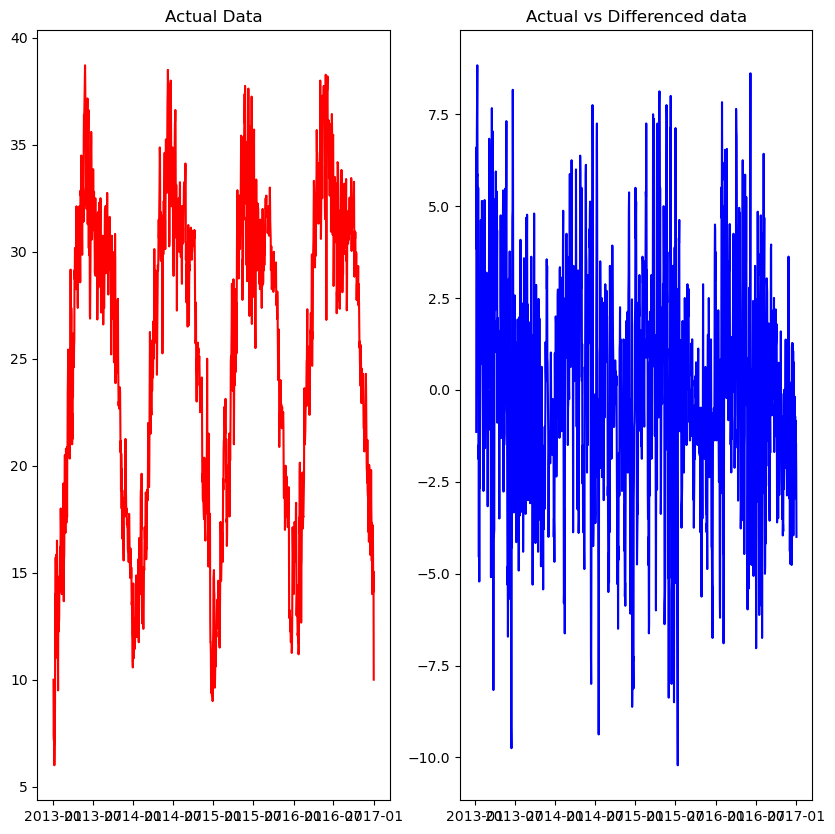

In [33]:
# plot the Actual data and Differenced data
ax = plt.subplots(figsize = (10,10))
plt.subplot(121)

plt.plot(Temperature,color='red')
plt.title('Actual Data')

plt.subplot(122)
plt.plot(diff_Temp,color='blue')
plt.title('Differenced Data')

plt.title("Actual vs Differenced data")

print("Conclusion : In the above figure the Actual plot shows the trend in the data which makes the data Not stationary that means \nwe can not proceed with the time series model. But after doing differencing we do not find the trend component in the plot which \nmake the data stationary also indicate that we can now proceed with the time series model.")

### Task 1.3 : Smoothen your data and try diffirent  smoothing periods.  

               actual        ma
date                           
2013-01-01  10.000000       NaN
2013-01-02   7.400000       NaN
2013-01-03   7.166667       NaN
2013-01-04   8.666667       NaN
2013-01-05   6.000000       NaN
...               ...       ...
2016-12-28  17.217391 -1.132333
2016-12-29  15.238095 -1.299000
2016-12-30  14.095238 -1.466347
2016-12-31  15.052632 -1.764023
2017-01-01  10.000000 -2.037832

[1462 rows x 2 columns]


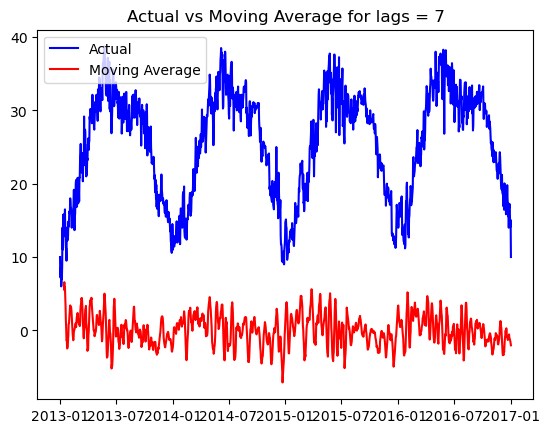

In [34]:
# Smoothening the data with Moving Average for week period i.e lag = 7

lags = 7                                                                  # lag = 7 for weekly period    
moving_avg = diff_Temp.rolling(window=lags).mean()                      # Moving Average 

df_ts = pd.DataFrame({'actual':train_data['meantemp'], 'ma':moving_avg})  # Creating dataframe with actual temperature and moving average temperature
print(df_ts)

# plotting the actual and moving average for comparison
plt.plot(df_ts.actual, color='blue',label = 'Actual')
plt.plot(df_ts.ma, color='red', label = 'Moving Average')
plt.title('Actual vs Moving Average for lags = ' + str(lags))            # For title
plt.legend()                                                             # For legend
plt.show()

               actual        ma
date                           
2013-01-01  10.000000       NaN
2013-01-02   7.400000       NaN
2013-01-03   7.166667       NaN
2013-01-04   8.666667       NaN
2013-01-05   6.000000       NaN
...               ...       ...
2016-12-28  17.217391 -1.514899
2016-12-29  15.238095 -1.550892
2016-12-30  14.095238 -1.500833
2016-12-31  15.052632 -1.520650
2017-01-01  10.000000 -1.507594

[1462 rows x 2 columns]


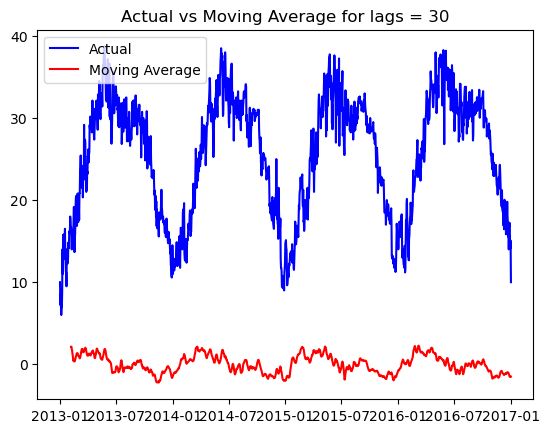

In [35]:
# Smoothening the data with Moving Average for month period i.e lag = 30

lags = 30                                                                 # lag = 30 for monthly period    
moving_avg = diff_Temp.rolling(window=lags).mean()                      # Moving Average 

df_ts = pd.DataFrame({'actual':train_data['meantemp'], 'ma':moving_avg})  # Creating dataframe with actual temperature and moving average temperature
print(df_ts)

# plotting the actual and moving average for comparison
plt.plot(df_ts.actual, color='blue',label = 'Actual')
plt.plot(df_ts.ma, color='red', label = 'Moving Average')
plt.title('Actual vs Moving Average for lags = ' + str(lags))            # For title
plt.legend()                                                             # For legend
plt.show()

Conclusion : From the visualizations, it is seen that data has both seasonal and trend component


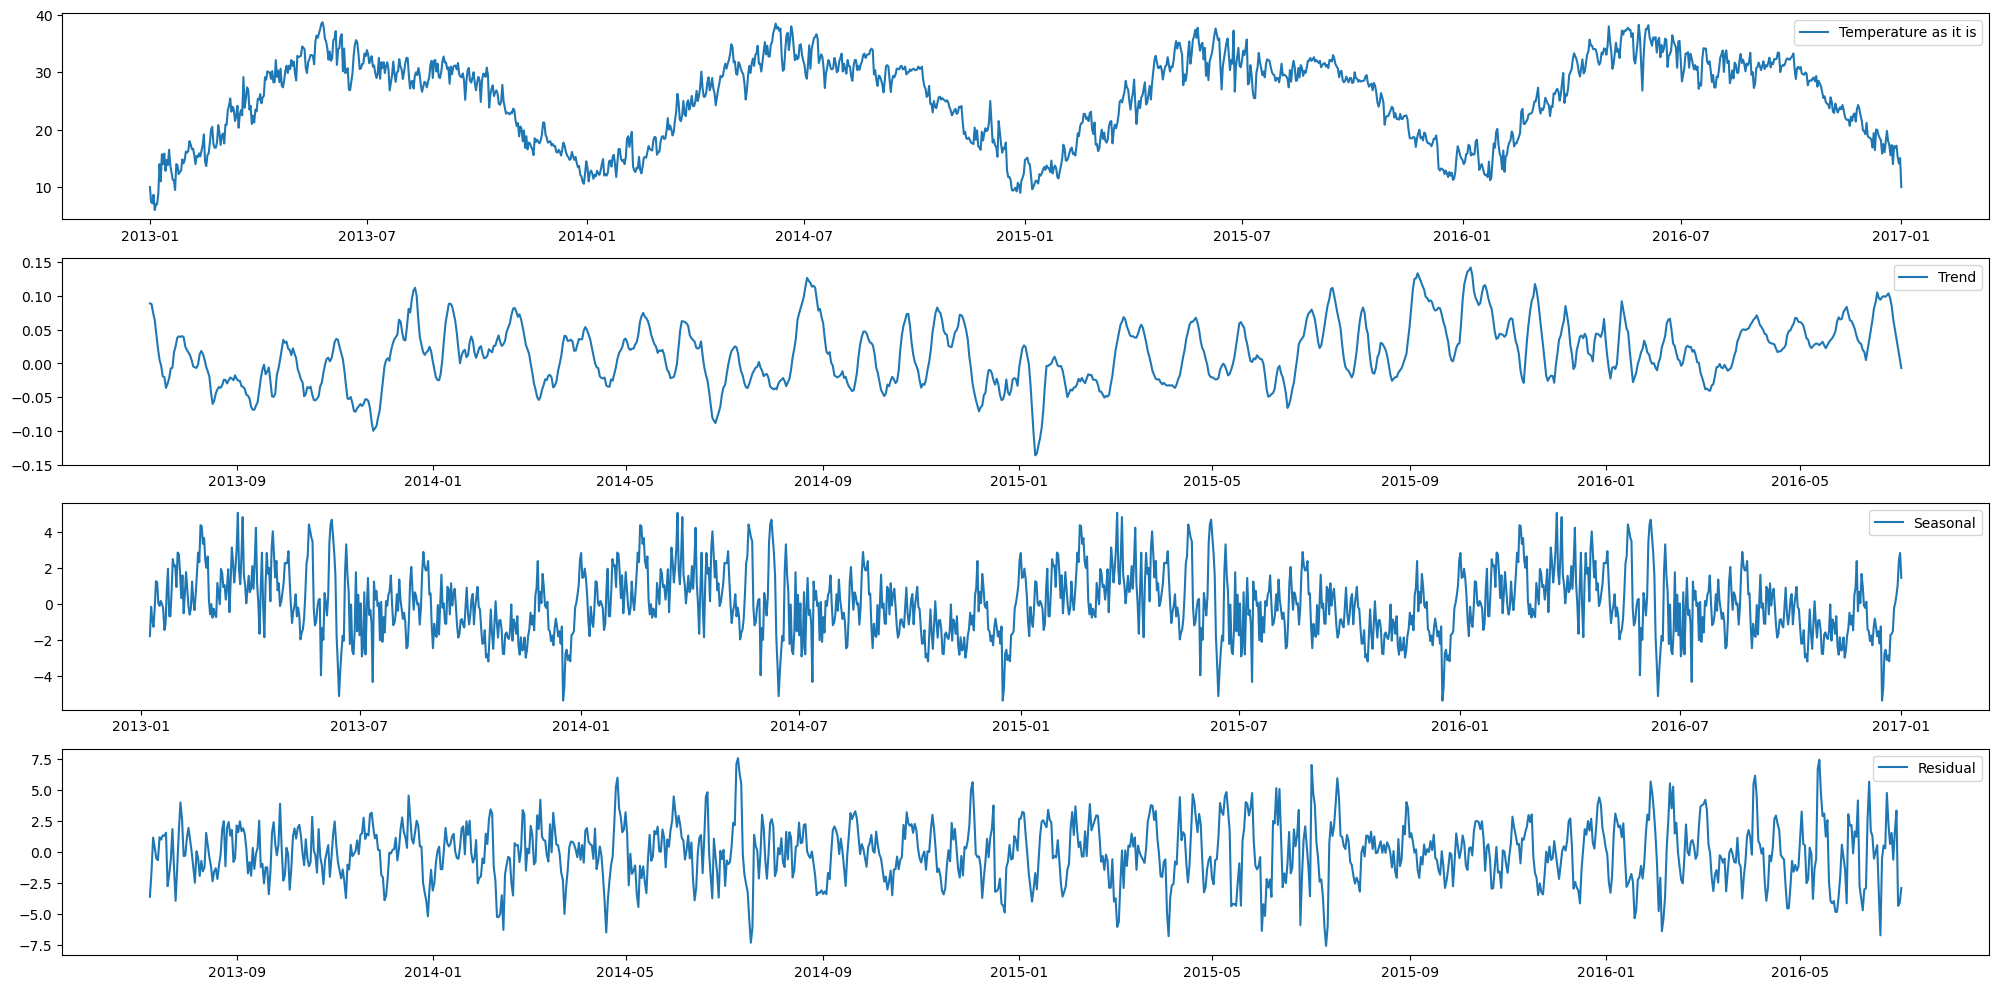

In [36]:
"""Plotting different components of the data. If data has no seasonal or trend component simple exponent smoothing 
technique can be used. If data has only trend component and not sesonality use double exponent smoothing. If it has
bot trend and seansonal component then use triple exponent smoothing. These can be validated by plotting graphs for each of 
the technique"""

# different components of the Time series data
# period = 365 since the data is daily

decomposition = seasonal_decompose(diff_Temp, period=365)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

#Seasonal decompose tells us what components are available in time series data.

# plotting all the 4 graphs

fig,ax = plt.subplots(4, 1, figsize=(20,10))   

plt.subplot(411)   
plt.plot(Temperature, label='Temperature as it is')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(d_trend, label='Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(d_seasonal, label='Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(d_residual, label='Residual')
plt.legend(loc = 'best')

plt.tight_layout()

print("Conclusion : From the visualizations, it is seen that data has both seasonal and trend component")

In [38]:
# Resampling the train data with respect to month and further decomposing the data. Comparing the visualization obtained before and after data resampling

resample=diff_Temp.resample('M').mean()
resample=pd.DataFrame(resample)              # converting into dataframe
resample.head()

,meantemp
date,
2013-01-31,1.850546
2013-02-28,1.146429
2013-03-31,0.944355
2013-04-30,1.908810
2013-05-31,1.012481


Conclusion : Any time series data is a combination of four components. Secular(trend), Cyclic,Seasonal and Irregular.After resampling  the date ,from the visuals data is showing smooth graph(less noise) than before sampling and also it is showin upward and seasonal trend as pattern is repeating after specific time interval.


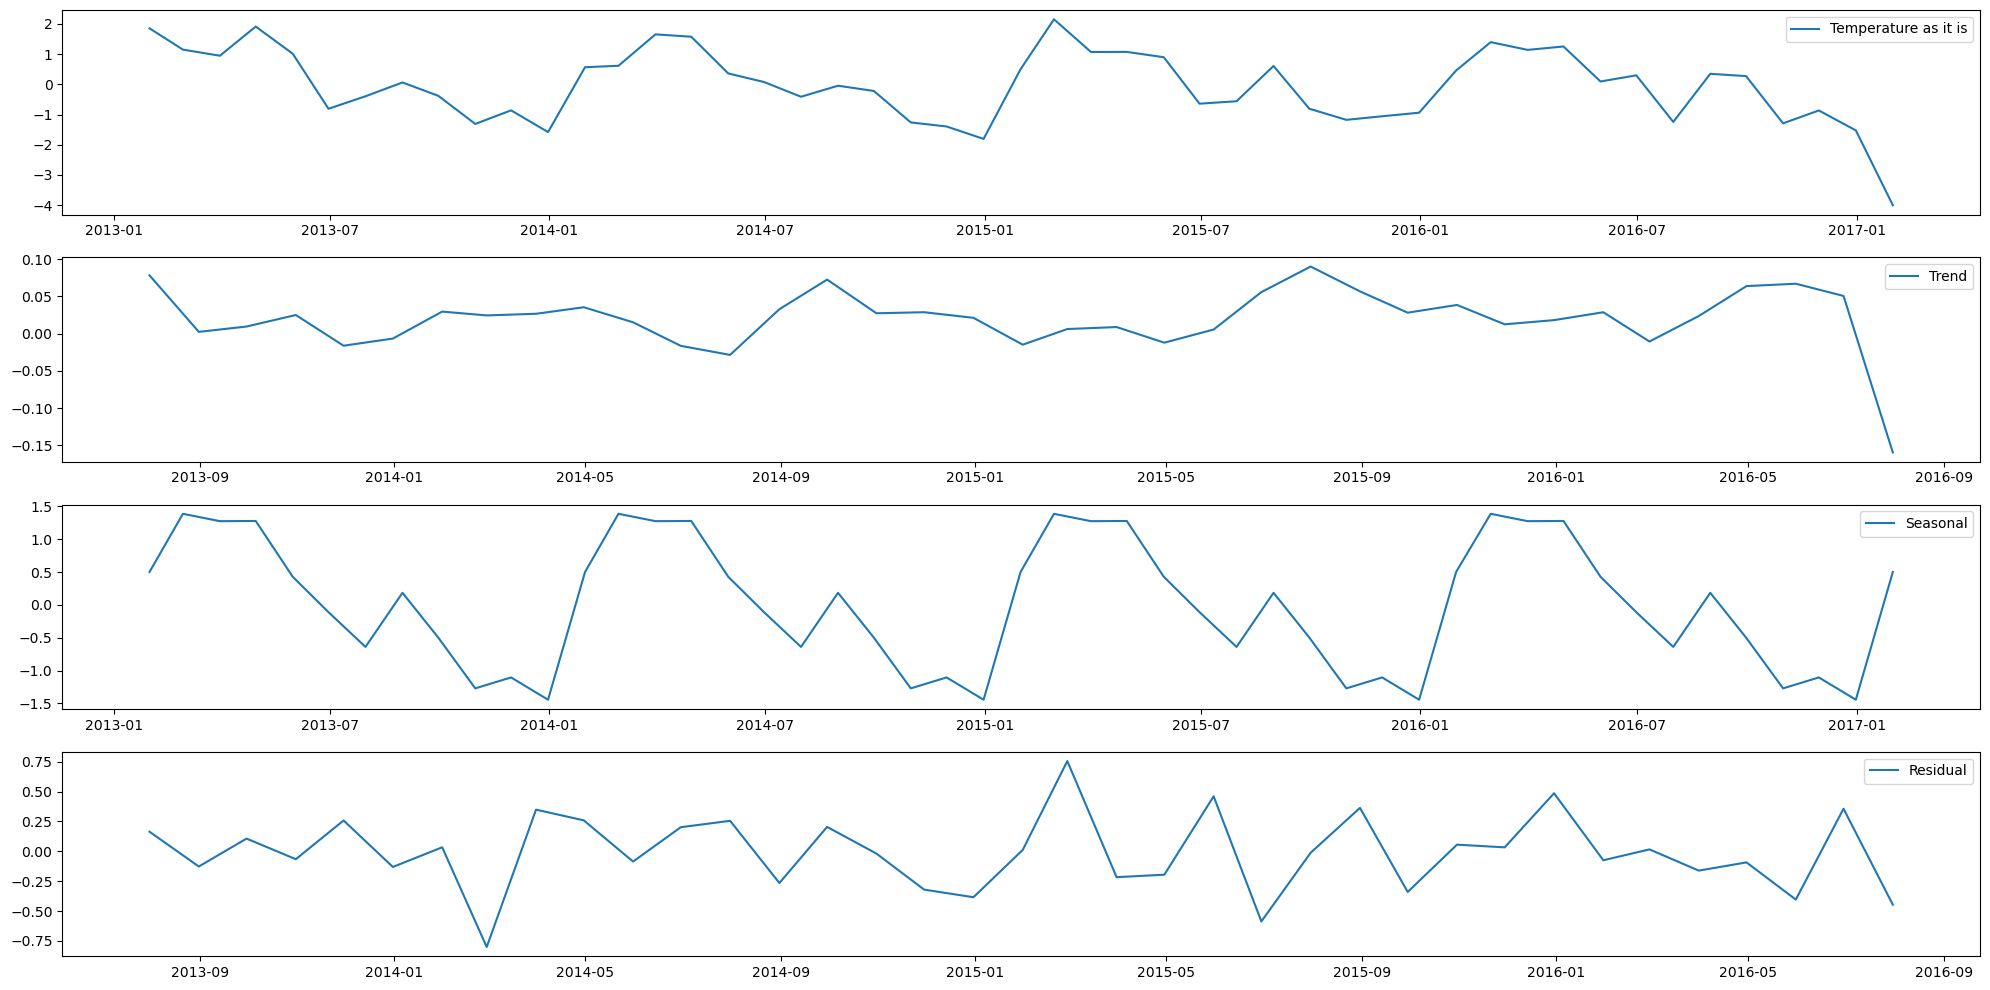

In [39]:
"""Plotting different components of the resample data for period =12 """

# different components of the Time series data
# period = 12 since the data is monthly

decomposition = seasonal_decompose(resample, period=12)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal   
d_residual = decomposition.resid

#Seasonal decompose tells us what components are available in time series data.

# plotting all the 4 graphs

fig,ax = plt.subplots(4, 1, figsize=(20,10))            # setting the canvas

plt.subplot(411)                                       
plt.plot(resample, label='Temperature as it is')        # plotting original temperature data
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(d_trend, label='Trend')                       # plotting trend component of the data
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(d_seasonal, label='Seasonal')                # plotting seasonal component of the data
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(d_residual, label='Residual')               # plotting residual component of the data
plt.legend(loc = 'best')

plt.tight_layout()

print("Conclusion : Any time series data is a combination of four components. Secular(trend), Cyclic,Seasonal and Irregular.After resampling  the date ,from the visuals data is showing smooth graph(less noise) than before sampling and also it is showin upward and seasonal trend as pattern is repeating after specific time interval.")

#### Simple Exponent Smoothing (no trend/seasonality) 

In [40]:
# Simple Exponent - when there is no trend/seasonality

def simplesmoothing(data,alpha):                                                          # defining the function
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)           # using simpleexponent() function giving value of smoothing parameter
    pdct = model.fittedvalues                                                             # predicted
    df = pd.DataFrame({'actual' : data, 'forecast' : pdct})                               # dataset of actual and forecasted data
    return(model,df)                                                                      # returning model and dataset

In [41]:
data = resample['meantemp']                                                            

In [42]:
# creating forecast for different values of alpha. Plot and understand the charts

# dictionary to store the forecast for each alpha
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model,df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

d_simple_exp

{0: date
 2013-01-31    1.850546
 2013-02-28    1.850546
 2013-03-31    1.850546
 2013-04-30    1.850546
 2013-05-31    1.850546
 2013-06-30    1.850546
 2013-07-31    1.850546
 2013-08-31    1.850546
 2013-09-30    1.850546
 2013-10-31    1.850546
 2013-11-30    1.850546
 2013-12-31    1.850546
 2014-01-31    1.850546
 2014-02-28    1.850546
 2014-03-31    1.850546
 2014-04-30    1.850546
 2014-05-31    1.850546
 2014-06-30    1.850546
 2014-07-31    1.850546
 2014-08-31    1.850546
 2014-09-30    1.850546
 2014-10-31    1.850546
 2014-11-30    1.850546
 2014-12-31    1.850546
 2015-01-31    1.850546
 2015-02-28    1.850546
 2015-03-31    1.850546
 2015-04-30    1.850546
 2015-05-31    1.850546
 2015-06-30    1.850546
 2015-07-31    1.850546
 2015-08-31    1.850546
 2015-09-30    1.850546
 2015-10-31    1.850546
 2015-11-30    1.850546
 2015-12-31    1.850546
 2016-01-31    1.850546
 2016-02-29    1.850546
 2016-03-31    1.850546
 2016-04-30    1.850546
 2016-05-31    1.850546
 2016-0

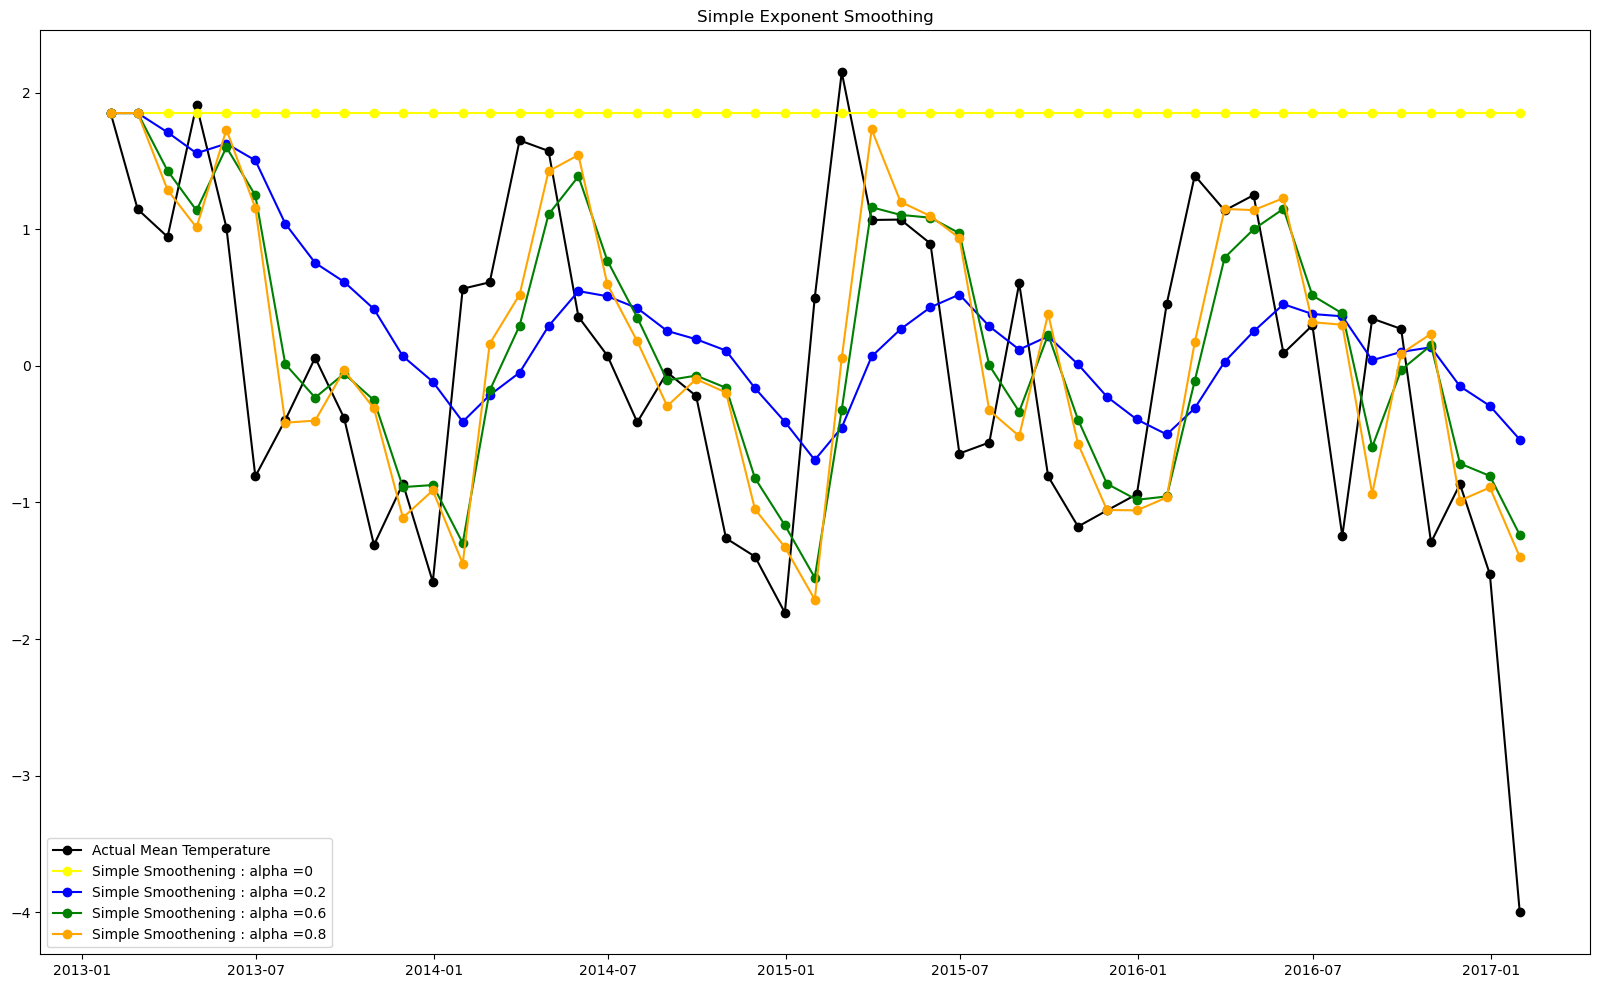

Conclusion :In the above time series plot using simple exponent smoothing we can observe that the 
higher the value of alpha has a more fitted line than the other line with respect to actual mean temperature line and more sensitive. 
This line adjust to the changing condition more smoothly.  


In [43]:
colors = ['yellow','blue','green','orange']

# plotting the actual and forecast data

fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual Mean Temperature')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]], marker='o', color=colors[i], label='Simple Smoothening : alpha =' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

print("Conclusion :In the above time series plot using simple exponent smoothing we can observe that the \nhigher the value of alpha has a more fitted line than the other line with respect to actual mean temperature line and more sensitive. \nThis line adjust to the changing condition more smoothly.  ")

#### Double Exponent Smoothing (trend, but no seasonality)

In [44]:
# Double Exponent - when there is a trend, no seasonality (Holts' method) 
# parameters: alpha, beta

model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)  # Setting value of smmothing parameters alpha and beta as 0.2 and 0.5 respectively

"""The additive model is useful when the seasonal variation is relatively constant over time.
The multiplicative model is useful when the seasonal variation increases over time."""

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2572\3206766826.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)  # Setting value of smmothing parameters alpha and beta as 0.2 and 0.5 respectively


date
2013-01-31    1.299856
2013-02-28    0.997624
2013-03-31    0.629896
2013-04-30    0.326744
2013-05-31    0.435321
2013-06-30    0.400632
2013-07-31   -0.112476
2013-08-31   -0.468859
2013-09-30   -0.609768
2013-10-31   -0.787809
2013-11-30   -1.168699
2013-12-31   -1.352900
2014-01-31   -1.666843
2014-02-28   -1.265637
2014-03-31   -0.747606
2014-04-30    0.114534
2014-05-31    0.934572
2014-06-30    1.290165
2014-07-31    1.396348
2014-08-31    1.202927
2014-09-30    0.996042
2014-10-31    0.674421
2014-11-30    0.015101
2014-12-31   -0.680196
2015-01-31   -1.431183
2015-02-28   -1.377909
2015-03-31   -0.652499
2015-04-30   -0.116376
2015-05-31    0.431816
2015-06-30    0.881569
2015-07-31    0.781683
2015-08-31    0.583621
2015-09-30    0.660473
2015-10-31    0.292260
2015-11-30   -0.222630
2015-12-31   -0.694526
2016-01-31   -1.072778
2016-02-29   -0.943505
2016-03-31   -0.418897
2016-04-30    0.105335
2016-05-31    0.661566
2016-06-30    0.818173
2016-07-31    0.932115
2016-0

Text(0.5, 1.0, 'Double Exponent Smoothing')

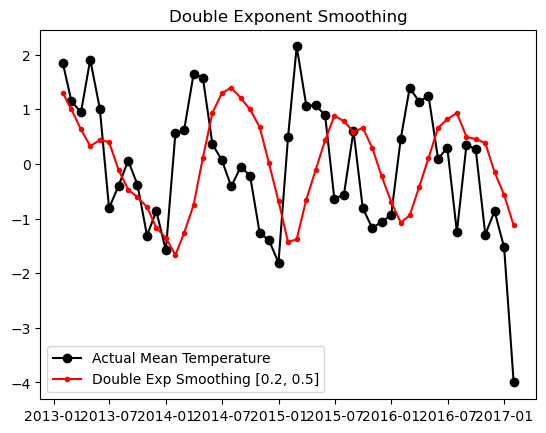

In [45]:
# plot the actual and smooth data

plt.plot(data,marker='o',color='black',label='Actual Mean Temperature')
plt.plot(f_dexp, marker='.',color='red',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

#### Triple Exponent Smoothing (trend and seasonality)

In [46]:
# build model

model =ExponentialSmoothing(data,trend='add',seasonal='add',seasonal_periods=12).fit()
print(model)

# forecast with triple exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

date
2013-01-31    0.208805
2013-02-28    1.576274
2013-03-31    1.451348
2013-04-30    1.701739
2013-05-31    0.840810
2013-06-30   -0.018798
2013-07-31   -0.402781
2013-08-31    0.491830
2013-09-30   -0.033800
2013-10-31   -1.009319
2013-11-30   -0.794515
2013-12-31   -1.212021
2014-01-31    0.041403
2014-02-28    1.408871
2014-03-31    1.283946
2014-04-30    1.534337
2014-05-31    0.673408
2014-06-30   -0.186200
2014-07-31   -0.570183
2014-08-31    0.324428
2014-09-30   -0.201202
2014-10-31   -1.176721
2014-11-30   -0.961917
2014-12-31   -1.379423
2015-01-31   -0.125999
2015-02-28    1.241469
2015-03-31    1.116544
2015-04-30    1.366935
2015-05-31    0.506006
2015-06-30   -0.353602
2015-07-31   -0.737585
2015-08-31    0.157026
2015-09-30   -0.368604
2015-10-31   -1.344123
2015-11-30   -1.129319
2015-12-31   -1.546825
2016-01-31   -0.293401
2016-02-29    1.074067
2016-03-31    0.949142
2016-04-30    1.199533
2016-05-31    0.338604
2016-06-30   -0.521004
2016-07-31   -0.904987
2016-0

Text(0.5, 1.0, 'Triple Exponent Smoothing')

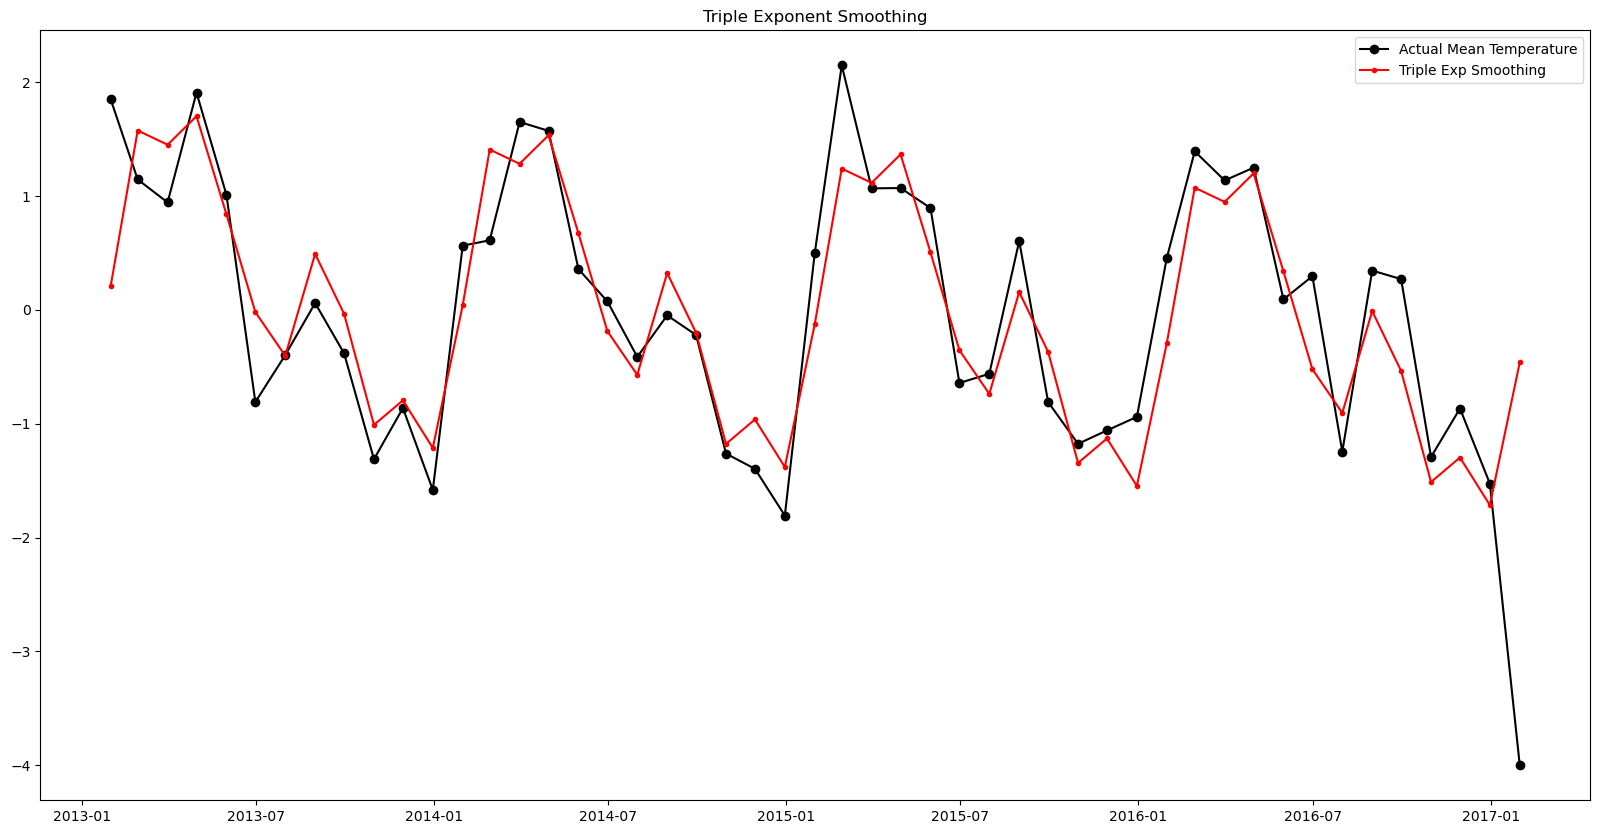

In [47]:
# plot the actual and triple smoothing values

ax=plt.subplots(figsize = (20,10))
plt.plot(data, marker='o', color='black', label='Actual Mean Temperature')
plt.plot(f_dexp, marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing')

#### Interpretation : From the visualization we can see that Triple Exponent Smoothing Technique work best for the dataset as graph is smoother  and closer to actual line than Double and Simple Exponent Smoothing Technique.

#### Also from Task 2, we have found that data has both trend and seasonality and Triple Exponent Smoothing Technique is used to smoothen the data that has both trend and seasonality.So Triple Exponent Smoothing will work best in order to forecast the temperature.

## Task 3 : Time Series Models

### Task 3.1 : Use ACF and PACF to determine the order of the model with 20 lags. Note p and q values.

In [62]:
data = f_dexp   # using smoothen data by triple exponent smoothing technique for building time series model

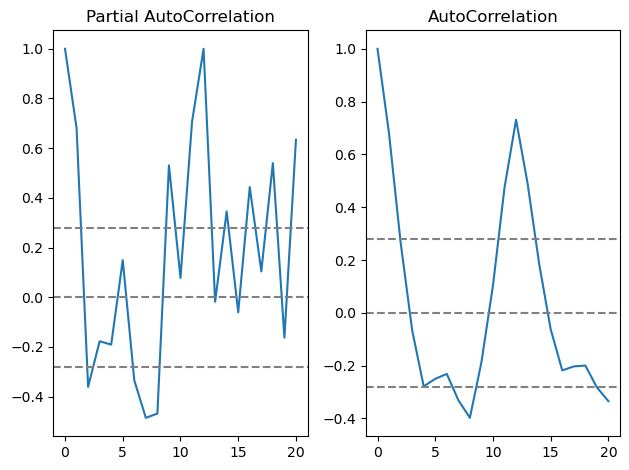

In [54]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# setting lag value as 20
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color="gray") #threshold for 95% of CI
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

#(show z- transform table)
# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

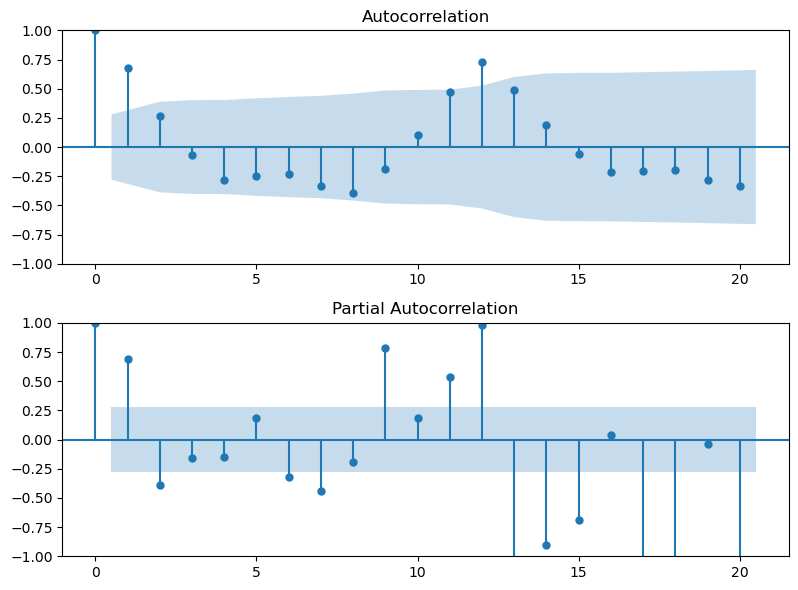

In [63]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(data, lags=20, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(data, lags=20, ax=ax2)

plt.tight_layout()

### Task 3.2 : Prepare AR model once stationarity is achieved. Find out the most suitable AR model by comparing different lag values. 

In [70]:
data = f_dexp   # using smoothen data by triple exponent smoothing technique for building time series model

In [71]:
# With p=1
#AR model

ar_m1 = ARIMA(data,order=(1,0,0)).fit()# model building 
print(ar_m1.summary()) # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -53.257
Date:                Sat, 09 Sep 2023   AIC                            112.514
Time:                        20:20:41   BIC                            118.190
Sample:                    01-31-2013   HQIC                           114.667
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0344      0.336     -0.102      0.919      -0.694       0.625
ar.L1          0.6682      0.134      4.983      0.000       0.405       0.931
sigma2         0.5085      0.158      3.212      0.0

In [72]:
# With p=2
#AR model

ar_m1 = ARIMA(data,order=(2,0,0)).fit()# model building 
print(ar_m1.summary()) # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -49.928
Date:                Sat, 09 Sep 2023   AIC                            107.855
Time:                        20:20:45   BIC                            115.422
Sample:                    01-31-2013   HQIC                           110.726
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0302      0.228     -0.132      0.895      -0.477       0.417
ar.L1          0.9235      0.188      4.908      0.000       0.555       1.292
ar.L2         -0.3807      0.161     -2.368      0.0

In [73]:
# With p=3
#AR model

ar_m1 = ARIMA(data,order=(3,0,0)).fit()# model building 
print(ar_m1.summary()) # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -49.180
Date:                Sat, 09 Sep 2023   AIC                            108.360
Time:                        20:21:08   BIC                            117.819
Sample:                    01-31-2013   HQIC                           111.949
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.209     -0.146      0.884      -0.441       0.380
ar.L1          0.8595      0.205      4.191      0.000       0.458       1.261
ar.L2         -0.2150      0.181     -1.187      0.2

### Interpretation:
AIC score of AR(1) model is  112.514

AIC score of AR(2) model is  108.360

AIC score of AR(3) model is  117.819

Lesser the AIC score is better the model. Hence AR(2) is the better model

### Task 3.3 : Prepare a MA model using stationary data. Find out the most suitable MA model by comparing different lag values

In [74]:
# With q=1
#MA model

ma_m1 = ARIMA(data,order=(0,0,1)).fit()# model building 
print(ma_m1.summary()) # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -52.215
Date:                Sat, 09 Sep 2023   AIC                            110.430
Time:                        20:26:05   BIC                            116.106
Sample:                    01-31-2013   HQIC                           112.584
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0325      0.188     -0.173      0.863      -0.401       0.336
ma.L1          0.8295      0.087      9.554      0.000       0.659       1.000
sigma2         0.4817      0.172      2.806      0.0

In [75]:
# With q=2
#MA model

ma_m1 = ARIMA(data,order=(0,0,2)).fit()# model building 
print(ma_m1.summary()) # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 -51.569
Date:                Sat, 09 Sep 2023   AIC                            111.138
Time:                        20:26:22   BIC                            118.706
Sample:                    01-31-2013   HQIC                           114.009
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0315      0.209     -0.151      0.880      -0.440       0.377
ma.L1          0.9267      0.158      5.859      0.000       0.617       1.237
ma.L2          0.1316      0.168      0.785      0.4

In [76]:
# With q=3
#MA model

ma_m1 = ARIMA(data,order=(0,0,3)).fit()# model building 
print(ma_m1.summary()) # printing summary of the model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 -46.302
Date:                Sat, 09 Sep 2023   AIC                            102.603
Time:                        20:26:37   BIC                            112.062
Sample:                    01-31-2013   HQIC                           106.192
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0291      0.446     -0.065      0.948      -0.904       0.846
ma.L1          1.0171      0.160      6.351      0.000       0.703       1.331
ma.L2          0.8190      0.332      2.469      0.0

### Interpretation:
AIC score of MA(1) model is 110.430

AIC score of MA(2) model is 111.138

AIC score of MA(3) model is 102.603

Lesser the AIC score is better the model. Hence MA(3) is the better model


### Task 3.4 : Use the ARIMA model to predict the mean temperature of the Delhi 

In [77]:
# splitting the data into train and test
ss = int(0.7 * len(data))

train = data.iloc[:ss]
test = data.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 34, test = 15


In [78]:
# Building the ARMA Model
# starting with initial values for p and q
p=1; q=1
m1 = ARIMA(train,order=(p,0,q))
r1 = m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -35.078
Date:                Sat, 09 Sep 2023   AIC                             78.156
Time:                        20:30:15   BIC                             84.262
Sample:                    01-31-2013   HQIC                            80.238
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.313      0.259      0.795      -0.533       0.695
ar.L1          0.3842      0.272      1.411      0.158      -0.149       0.918
ma.L1          0.5282      0.216      2.446      0.0

In [79]:
# starting with initial values for p and q
p=2; q=1
m2 = ARIMA(train,order=(p,0,q))
r2 = m2.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -31.398
Date:                Sat, 09 Sep 2023   AIC                             72.797
Time:                        20:30:26   BIC                             80.429
Sample:                    01-31-2013   HQIC                            75.400
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0866      0.051      1.699      0.089      -0.013       0.186
ar.L1          1.5317      0.154      9.915      0.000       1.229       1.835
ar.L2         -0.8189      0.126     -6.474      0.0

In [80]:
# startting with initial values for p and q
p=2; q=2
m3 = ARIMA(train,order=(p,0,q))
r3 = m3.fit()
print(r3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -31.342
Date:                Sat, 09 Sep 2023   AIC                             74.684
Time:                        20:30:38   BIC                             83.842
Sample:                    01-31-2013   HQIC                            77.807
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0865      0.063      1.381      0.167      -0.036       0.209
ar.L1          1.4942      0.167      8.971      0.000       1.168       1.821
ar.L2         -0.7836      0.139     -5.636      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Interpretation:
AIC score of ARMA(1,1) model is 78.156

AIC score of ARMA(2,1) model is 72.797

AIC score of ARMA(2,2) model is 74.684

Lesser the AIC score is better the model. Hence ARMA(2,1) is the better model

## Task 4 : Evaluation and forecasting 

### Task 4.1 : Predict test sets and visualize forecast and ground truth 

In [81]:
# predictions
predictions = r1.predict(0,len(test)-1)
print(predictions)

date
2013-01-31    0.081205
2013-02-28    0.164324
2013-03-31    1.310998
2013-04-30    0.679286
2013-05-31    1.238931
2013-06-30    0.163276
2013-07-31   -0.053314
2013-08-31   -0.289275
2013-09-30    0.651498
2013-10-31   -0.324932
2013-11-30   -0.699224
2013-12-31   -0.305555
2014-01-31   -0.894396
2014-02-28    0.560184
2014-03-31    1.039520
Freq: M, Name: predicted_mean, dtype: float64


In [88]:
# actual vs predicted values
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

      actual  predicted       err
0  -1.129319   0.081205 -1.210524
1  -1.546825   0.164324 -1.711149
2  -0.293401   1.310998 -1.604399
3   1.074067   0.679286  0.394781
4   0.949142   1.238931 -0.289789
5   1.199533   0.163276  1.036257
6   0.338604  -0.053314  0.391918
7  -0.521004  -0.289275 -0.231729
8  -0.904987   0.651498 -1.556484
9  -0.010376  -0.324932  0.314556
10 -0.536006  -0.699224  0.163218
11 -1.511525  -0.305555 -1.205970
12 -1.296721  -0.894396 -0.402325
13 -1.714227   0.560184 -2.274411
14 -0.460803   1.039520 -1.500323


<AxesSubplot:>

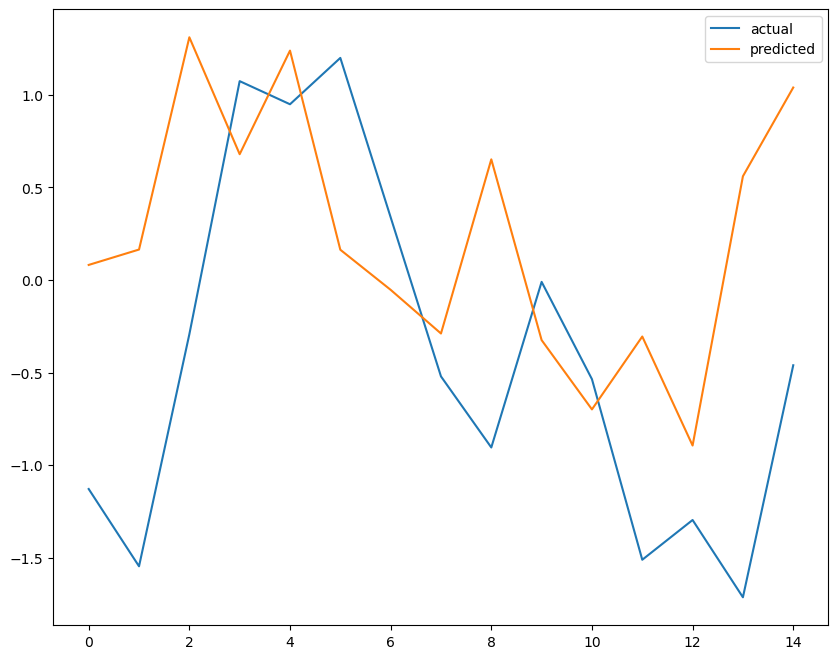

In [86]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)

### Task 4.2 : Use a known evaluation metric and residual plots to interpret the results. Use RMSE for evaluation 

In [91]:
# MSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(2,2)
	MSE = 1.3384550302107718
	RMSE = 1.1569161725080914
